In [ ]:
from numpy import array
from numpy import argmax
import numpy as np


In [480]:
text_file = open("output2.txt", "r")

In [481]:
dataset=text_file.read().splitlines()
dataset=list(filter(None,dataset))

In [482]:
# define universe of possible input values
alphabet = set('')
for l in dataset:
    alphabet=alphabet.union(set(l))
print(alphabet)
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in alphabet]
print(integer_encoded)

{'G', 'w', 'Г', 'у', 'С', 'к', 'k', 'i', 'n', '1', '>', 'о', 'y', '»', 'ь', '(', 'Ы', 'Б', 't', 'C', 'Ь', 'U', 'X', 'И', 'o', '{', 'У', 'T', 'П', 'I', '"', 'P', 'c', '\\', 'D', 'g', 'J', '8', 'е', 'Р', 'Ж', 'д', 'б', 'Л', 'H', 'З', 'O', 'Q', 'Д', 'й', '«', 'ъ', 'b', 'r', '3', 'Ц', 'W', '0', 'н', '.', 'j', ':', 'K', '+', '5', 'х', 'A', ')', 'п', 'Ю', 'Х', 'F', 'a', '4', 'B', 'Т', 'ш', 'з', '%', 'ц', '!', 'г', 'f', 'N', 'э', 'Э', 'с', 'ё', '<', 'E', '7', 's', 'Ф', 'e', 'M', 'L', 'ж', 'V', 'S', 'Ч', '_', '№', 'т', 'Е', 'а', 'м', 'Ш', 'О', 'Y', 'R', 'd', 'Н', 'Z', 'Щ', 'h', 'p', '2', '/', 'l', '=', 'v', 'щ', 'ю', 'В', 'Я', 'я', 'ы', 'x', 'm', 'z', '9', 'в', '*', '-', 'М', 'К', 'ф', 'Й', 'р', 'и', 'л', 'Ъ', 'u', 'ч', 'А', '6', '~'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [483]:
# one hot encode
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)

In [484]:
print(len(onehot_encoded))

147


In [485]:
import math

def encode_word(word):
    vec=[0]*len(alphabet)
    for c in list(word):
        vec+=array(onehot_encoded[char_to_int[c]])
    return vec / np.linalg.norm(vec)

ngram_vectorize=[]

# encode n-grams
for word in dataset:
    vec = encode_word(word)
    ngram_vectorize.append(vec)

In [486]:
import skfuzzy as fuzz

In [487]:
vector_array=np.asarray(ngram_vectorize)
vector_array.shape

(11643, 147)

In [488]:
#cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
#        vector_array.T,3, 2, error=0.005, maxiter=10000, init=None)

In [489]:
#print(fpc)

In [490]:
import  sklearn
from sklearn.decomposition import PCA

n_components = 7

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(ngram_vectorize)
#principalComponents = sklearn.preprocessing.normalize(principalComponents)

print(principalComponents[0])
print(np.linalg.norm(principalComponents[0]))


[-0.12945428  0.44823725 -0.32547518  0.20636642  0.0513573  -0.22281777
  0.0618764 ]
0.6498540246680803


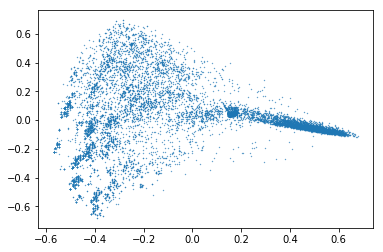

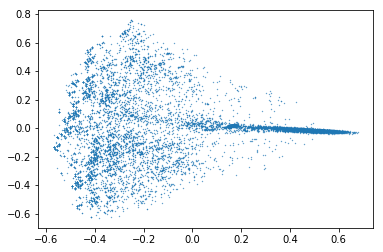

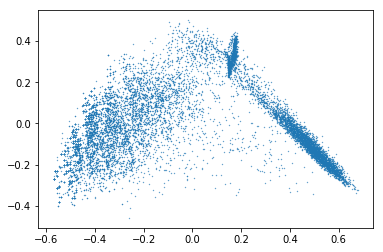

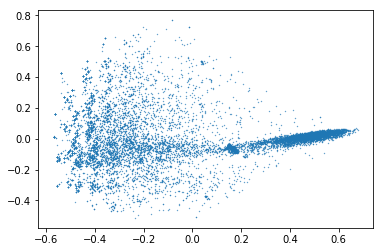

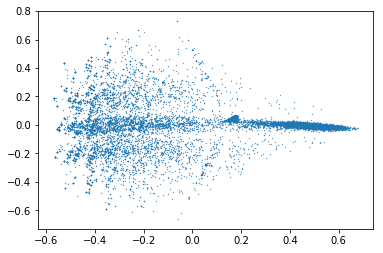

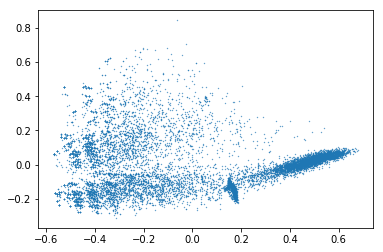

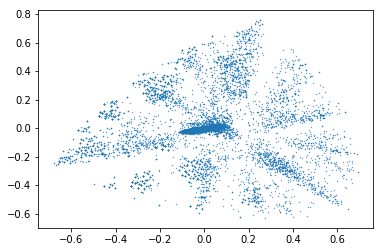

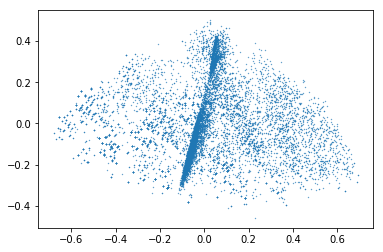

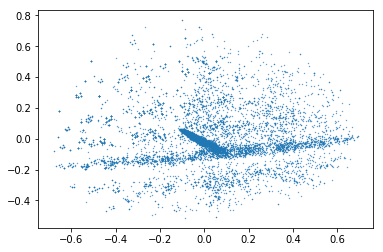

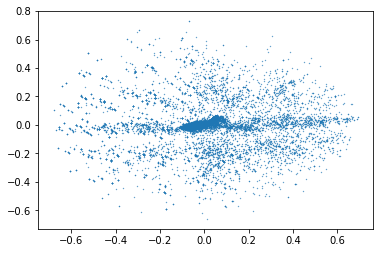

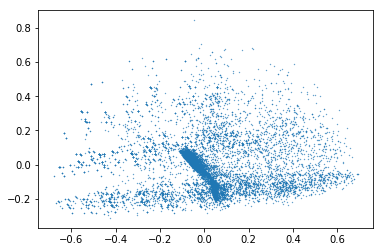

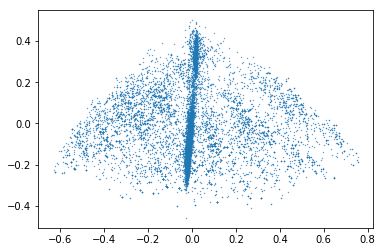

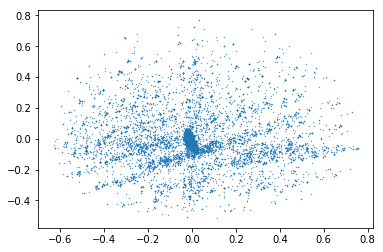

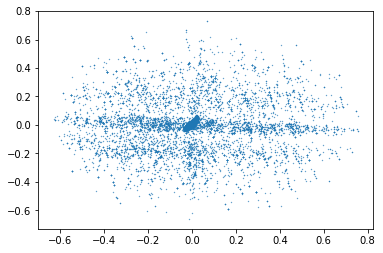

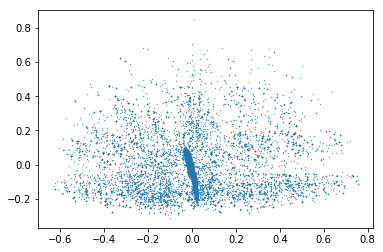

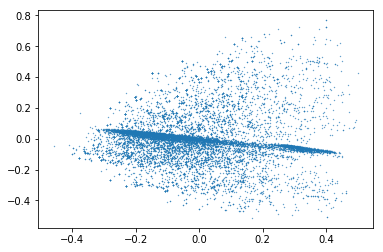

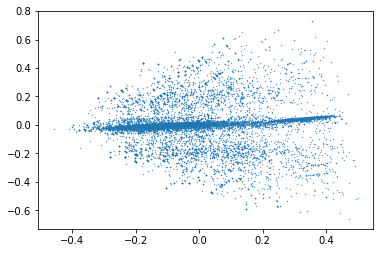

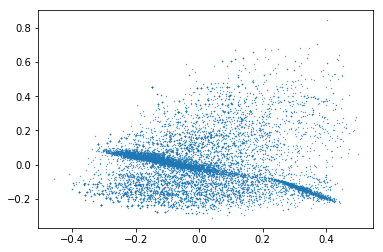

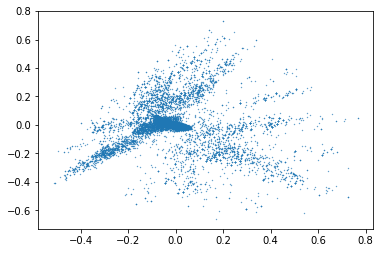

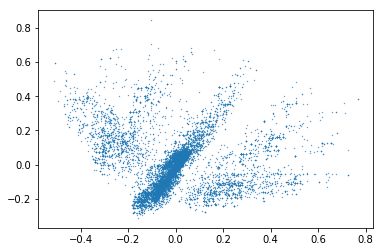

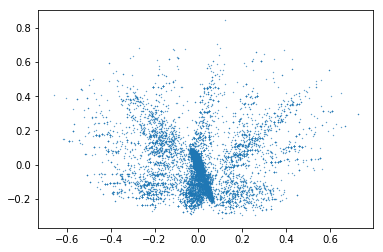

In [491]:
import matplotlib.pyplot as plt
for i in range(n_components):
    for j in range(i+1, n_components):
        plt.scatter(principalComponents[:,i], principalComponents[:,j], 0.1)
        plt.show()

num_clusters = 13;

pca = PCA(n_components=13)
principalComponents = pca.fit_transform(ngram_vectorize)
vector_array=np.asarray(principalComponents)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vector_array.T, num_clusters, 2, error=0.005, maxiter=10000, init=None)
print(fpc)

In [492]:
num_clusters = 56
vector_array=np.asarray(principalComponents)
print(vector_array.shape)
#vector_array=np.asarray(ngram_vectorize)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans( vector_array.T, num_clusters, 2, error=0.005, maxiter=10000, init=None)
print(cntr.shape)
print("Fpc: " + str(fpc))

word2Pc = {}
for i, w in enumerate(dataset):
    word2Pc[w] = vector_array[i]

print("First pc: " + str(word2Pc[dataset[0]]))      
      
word2Predict = {}
for i, w in enumerate(dataset):
    word2Predict[w] = u.T[i]
      
print("First predict: " + str(word2Predict[dataset[0]]))

(11643, 7)
(56, 7)
Fpc: 0.2035341959811869
First pc: [-0.12945428  0.44823725 -0.32547518  0.20636642  0.0513573  -0.22281777
  0.0618764 ]
First predict: [0.00897698 0.01883692 0.04589439 0.01885462 0.0153406  0.01885752
 0.0188584  0.01884118 0.0188602  0.01883907 0.0188416  0.01885351
 0.02899002 0.01883749 0.01885198 0.01884471 0.01886769 0.01883693
 0.01885985 0.01884069 0.0186054  0.0188611  0.01883935 0.01885684
 0.018862   0.01884824 0.01517761 0.00980784 0.01886423 0.01884028
 0.01885516 0.0107516  0.01740414 0.01884786 0.01777329 0.0188485
 0.01884543 0.01883656 0.01883919 0.01884958 0.01887326 0.01884695
 0.0188542  0.0188448  0.01668169 0.00781494 0.01886354 0.0188395
 0.01183357 0.00727499 0.01885207 0.01883696 0.01314644 0.01124616
 0.00814663 0.01884571]


In [493]:
def predict(vec):
    varr = np.asarray([vec]).T
    u_predict, u0_predict, d_predict, jm_predict, p_predict, fpc_predict = fuzz.cluster.cmeans_predict(varr, cntr, 2, error=0.005, maxiter=10000)
    return u_predict.T[0]


In [494]:
cluster_membership = np.argmax(u, axis=0)

In [495]:
import pandas as pd

dataframes = []
dataset_arr=np.asarray(dataset)
for i in range(num_clusters):
    words_cl=dataset_arr[cluster_membership == i]
    i_dataframe = pd.DataFrame({'#' + str(i) : words_cl})
    dataframes.append(i_dataframe)
    
pd.concat(dataframes, axis=1)

,#0,#1,#2,#3,#4,#5,#6,#7,#8,#9,...,#46,#47,#48,#49,#50,#51,#52,#53,#54,#55
0,потребит.,NaN,5-BL-300.,NaN,КотШрСПНПж/О,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,(запчасть,спасательное,NaN,NaN,гол.,23-32А,Стерильная,NaN
1,изменения,NaN,-90.4-320-2.3АИР100S4,NaN,Вид,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Что,декоративных,NaN,NaN,н/ст5,22163,кандидатов,NaN
2,футболиста,NaN,5S-200/5,NaN,Бт,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,свою,Конденсатор,NaN,NaN,иглы,20664,Тиражирование:,NaN
3,магнитная,NaN,50А,NaN,Пуск,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ком.в,Сантехническая,NaN,NaN,(1н.о+,27мм,полимерам,NaN
4,двигателями,NaN,02.,NaN,(т),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,(крепеж),неполн.резьба,NaN,NaN,круг,6-2,Мановакууметр,NaN
5,желудочный,NaN,060-064*150,NaN,кВт,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Столб,(видеокарта,NaN,NaN,Ушко,26219,детали,NaN
6,балонный,NaN,20105,NaN,Тип-,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Реле,пластиковые,NaN,NaN,Шпалы,20253,канцелярский,NaN
7,визитная,NaN,82005,NaN,дл=н/д5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Импульсный,шестигран,NaN,NaN,(включающая),26345,керамическая,NaN
8,пакете,NaN,ВИП100-220АС24TS,NaN,мл,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,хирургич.,компьютерной,NaN,NaN,инд.уп.,23251,контроля,NaN
9,Ацетилсалициловая,NaN,20мм,NaN,сер.58Р,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Рычажная,Перфорированная,NaN,NaN,дл=н/д,20392,Психрометр/Термогигрометра/Гигрометр,NaN


In [499]:
word1 = '5мм'
word2 = '5мм'

pcVec1 = word2Pc[word1]
pcVec2 = (word2Pc['5'] + word2Pc['мм'])/2
#pcVec2 = pcVec2 / np.linalg.norm(pcVec2)

print("PC vectors")
print(pcVec1)
print(pcVec2)
vecDiff = pcVec1 - pcVec2;
print("Diff: " + str(np.linalg.norm(vecDiff)))

predict1 = predict(pcVec1);
predict2 = predict(pcVec2);
print(predict1)
print(predict2)
predictDiff = predict1 - predict2
print("Predict diff: " + str(predictDiff))
print("Predict diff norm: " + str(np.linalg.norm(predictDiff)))

def bestMatches(word):
    vals = []
    wordP = word2Predict[word]
    for k, v in word2Predict.items():
        d = np.linalg.norm(wordP - v)
        vals.append([d, k])
        
    vals.sort(key=lambda x : x[0])
    print(vals[0:10])

#bestMatches(word1)
#bestMatches(word2)

PC vectors
[ 0.15435308  0.06885739 -0.03411777  0.29058283 -0.30602349 -0.20779922
  0.28693683]
[ 0.11832909  0.05702285 -0.02126799  0.30595717 -0.30421965 -0.21294601
  0.29345117]
Diff: 0.04372014194899938
[0.01630533 0.01693419 0.01350782 0.01693013 0.03036561 0.01692933
 0.01692929 0.01693331 0.0169289  0.01693375 0.01693322 0.01693042
 0.00964254 0.01693408 0.01693085 0.01693254 0.01692571 0.01693419
 0.01692863 0.01693342 0.01695883 0.01692823 0.01693369 0.01692952
 0.01692857 0.01693174 0.02496577 0.01829944 0.01692713 0.0169335
 0.01692998 0.02054969 0.03031825 0.01693182 0.03171186 0.01693166
 0.01693238 0.01693426 0.01693373 0.01693141 0.01692268 0.01693203
 0.0169303  0.01693252 0.02851308 0.00992988 0.01692739 0.01693366
 0.02320724 0.01241868 0.01693079 0.01693418 0.02616381 0.01245956
 0.01436715 0.01693232]
[0.01494889 0.0173667  0.01334464 0.01736227 0.02810034 0.0173614
 0.01736135 0.01736573 0.01736092 0.01736622 0.01736563 0.01736258
 0.00942255 0.01736658 0.01736